In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from scipy import stats
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [2]:
movie_data = pd.read_csv('tmdb_5000_movies.csv')



In [3]:
movie_data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:

movie_data = movie_data.drop(['homepage', 'original_language','production_companies','production_countries','status','spoken_languages'], axis=1)

movie_data['genres'] = movie_data['genres'].apply(lambda x: ', '.join([genre['name'] for genre in ast.literal_eval(x)]))


movie_data['keywords'] = movie_data['keywords'].apply(
    lambda x: ', '.join([keyword['name'] for keyword in ast.literal_eval(x)])
    if isinstance(x, str) else ''
)


movie_data['budget'] = movie_data['budget'].apply(lambda x: np.log10(x) if x > 0 else 0)

movie_data['revenue'] = movie_data['revenue'].apply(lambda x: np.log10(x) if x > 0 else 0)




In [5]:
movie_data.head()

,budget,genres,id,keywords,original_title,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,9.445287,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,8.477121,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,8.982723,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,8.389166,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,8.944815,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,8.397940,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,9.035405,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,8.414973,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,8.453531,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
unique_numbers = []
for i in movie_data.columns:
    x = movie_data[i].value_counts().count()
    unique_numbers.append(x)
    
pd.DataFrame(unique_numbers,index = movie_data.columns,columns=["Total unique_numbers "])
        

,Total unique_numbers
budget,435
genres,1175
id,4803
keywords,4222
original_title,4801
overview,4800
popularity,4802
release_date,3280
revenue,3297
runtime,156


In [7]:

numerical_columns = movie_data.select_dtypes(include=[np.number]).columns

movie_data = movie_data.replace([np.inf, -np.inf], np.nan)

movie_data = movie_data.dropna(subset=numerical_columns)



movie_data.head()

,budget,genres,id,keywords,original_title,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,9.445287,162.0,Enter the World of Pandora.,Avatar,7.2,11800
1,8.477121,"Adventure, Fantasy, Action",285,"ocean, drug abuse, exotic island, east india t...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,8.982723,169.0,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,8.389166,"Action, Adventure, Crime",206647,"spy, based on novel, secret agent, sequel, mi6...",Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,8.944815,148.0,A Plan No One Escapes,Spectre,6.3,4466
3,8.397940,"Action, Crime, Drama, Thriller",49026,"dc comics, crime fighter, terrorist, secret id...",The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,9.035405,165.0,The Legend Ends,The Dark Knight Rises,7.6,9106
4,8.414973,"Action, Adventure, Science Fiction",49529,"based on novel, mars, medallion, space travel,...",John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,8.453531,132.0,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
movie_data[numerical_columns].describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,5.646779,57016.320142,21.501089,5.309501,106.875859,6.093189,690.503020
std,3.058474,88406.741790,31.820361,3.541804,22.611935,1.191493,1234.764044
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.903090,9013.000000,4.680206,0.000000,94.000000,5.600000,54.000000
50%,7.176091,14624.000000,12.928269,7.282848,103.000000,6.200000,236.000000
75%,7.602060,58574.000000,28.350529,7.968115,118.000000,6.800000,737.000000
max,8.579784,447027.000000,875.581305,9.445287,338.000000,10.000000,13752.000000


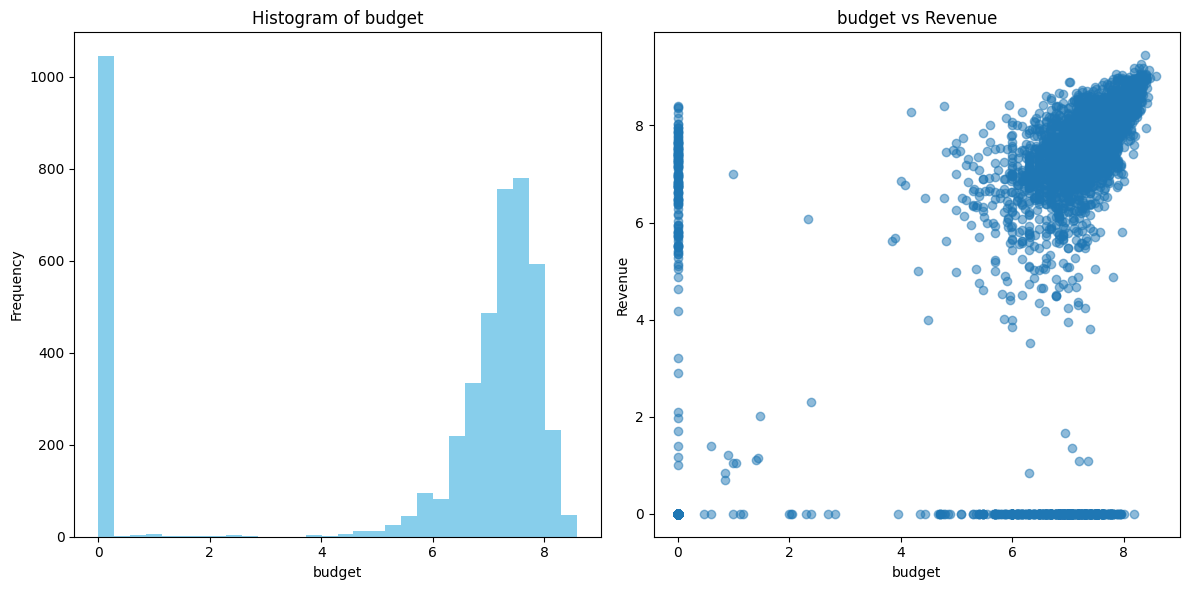

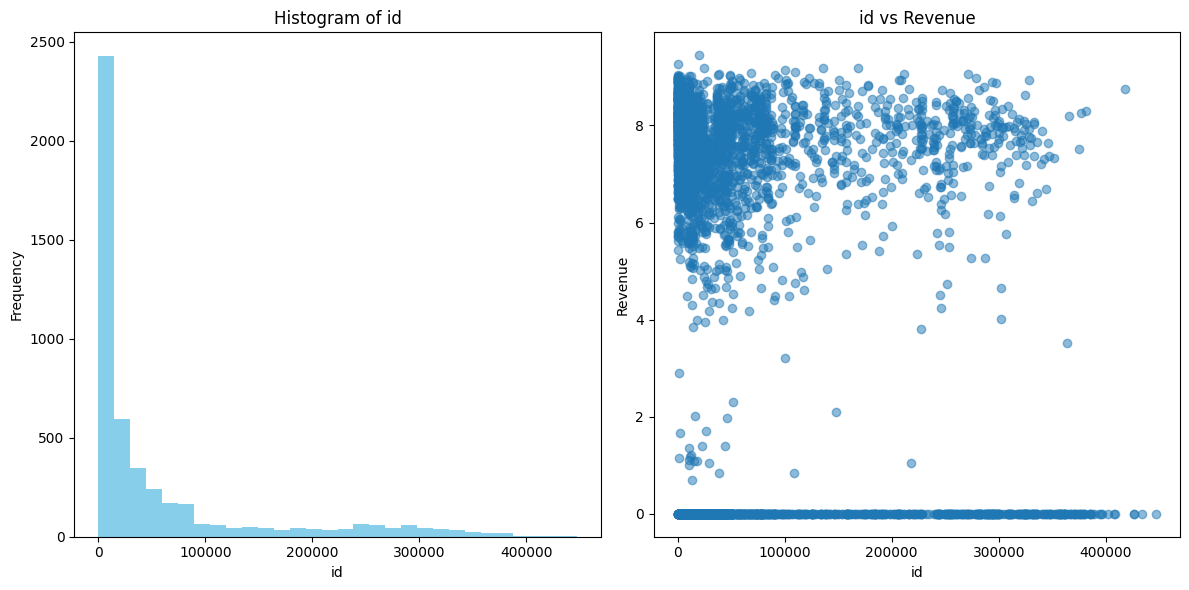

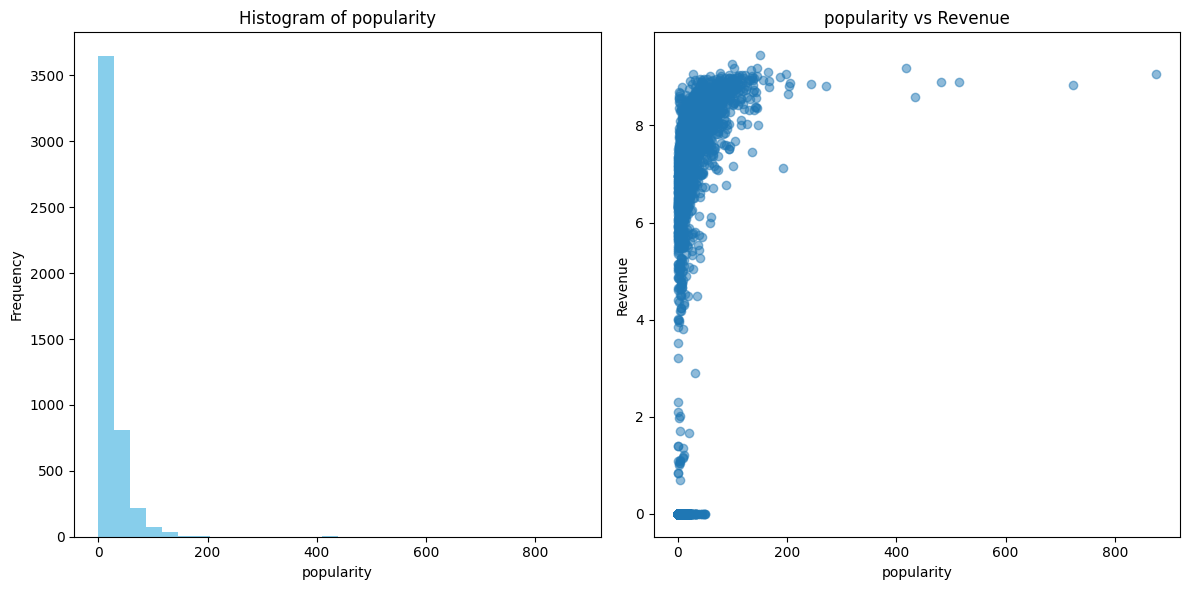

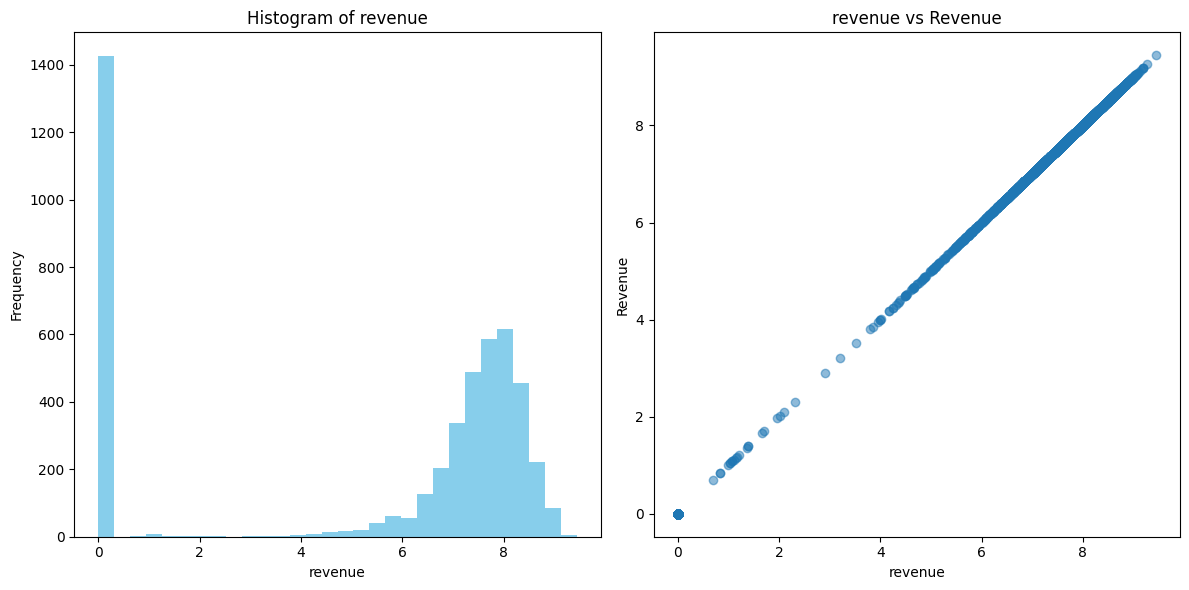

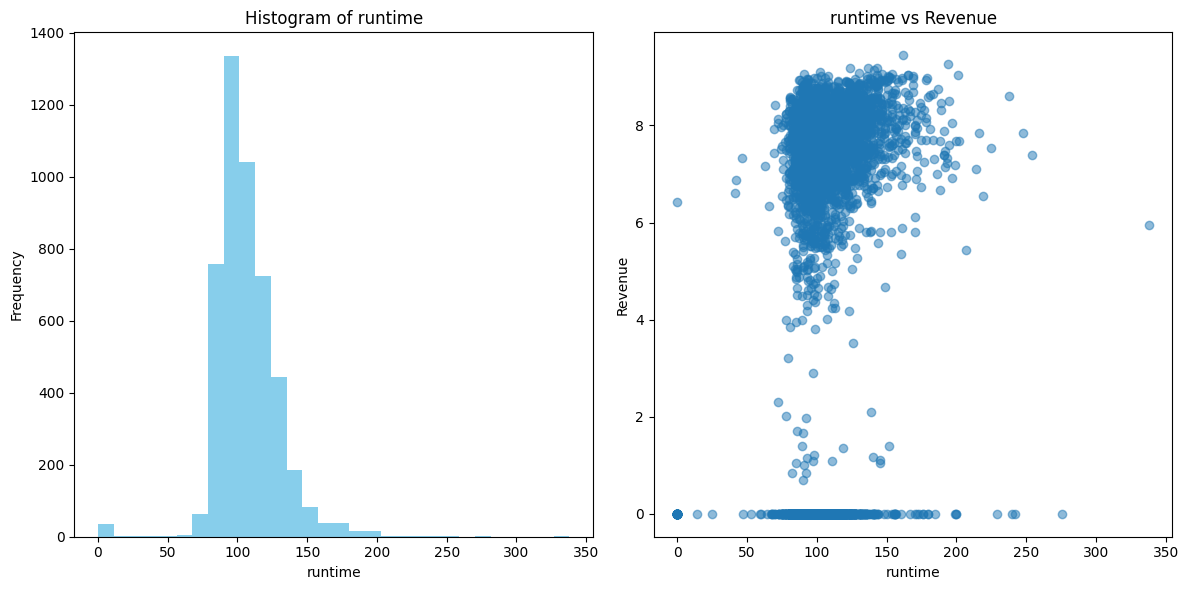

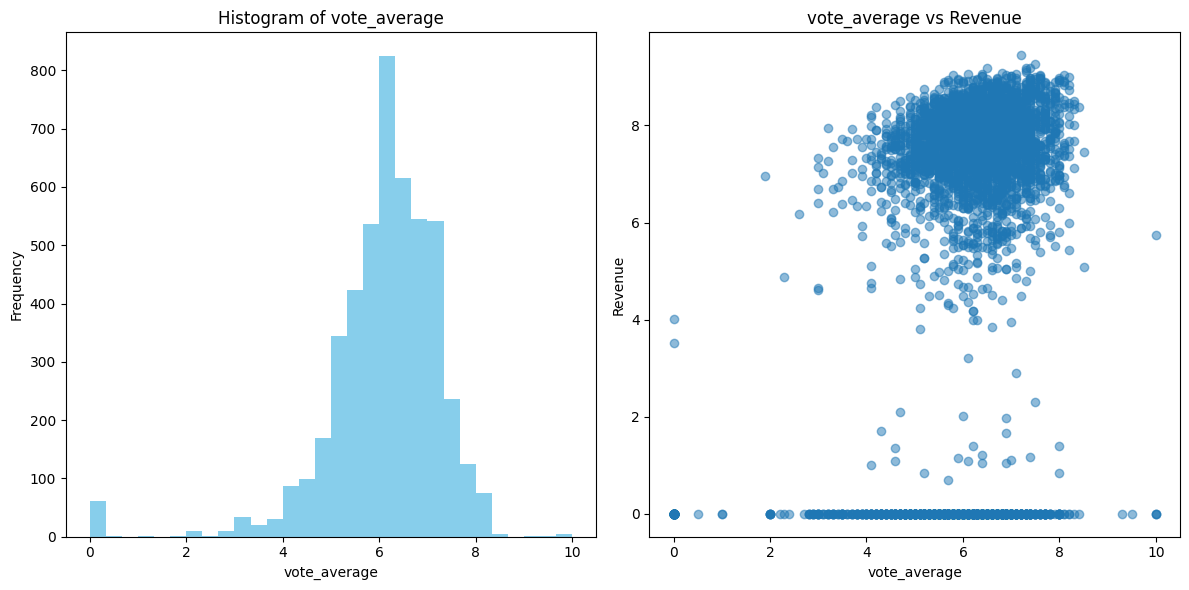

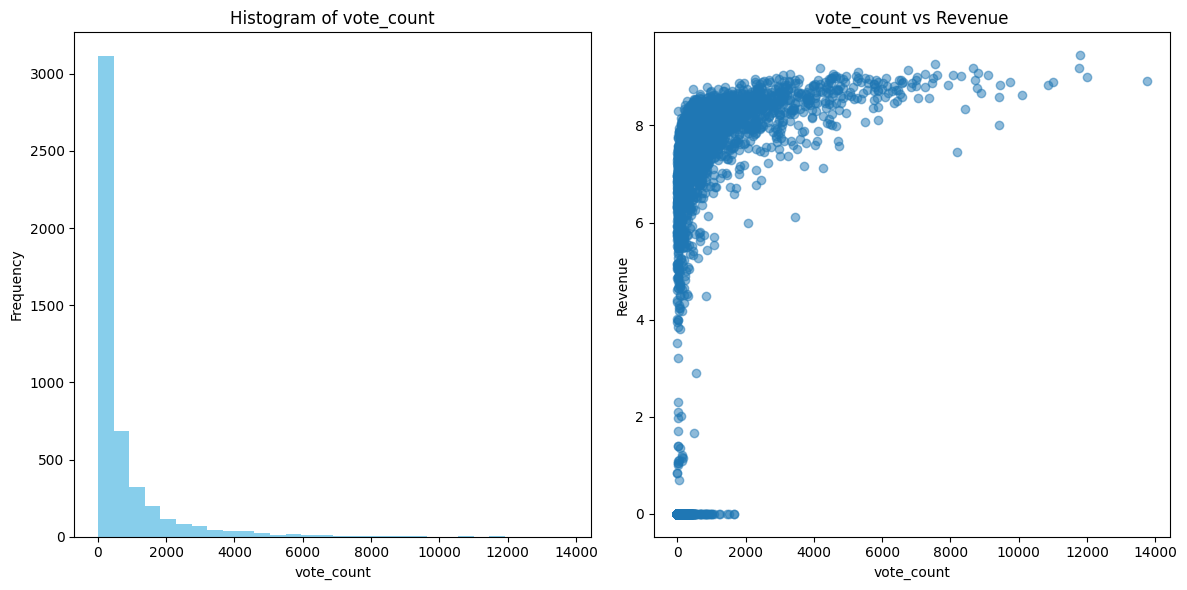

In [9]:
for col in numerical_columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    axs[0].hist(movie_data[col].dropna(), bins=30, color='skyblue')
    axs[0].set_title(f'Histogram of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')
    
    if 'revenue' in numerical_columns:
        axs[1].scatter(movie_data[col].dropna(), movie_data['revenue'].dropna(), alpha=0.5)
        axs[1].set_title(f'{col} vs Revenue')
        axs[1].set_xlabel(col)
        axs[1].set_ylabel('Revenue')
    else:
        axs[1].text(0.5, 0.5, 'Revenue column not found', ha='center', va='center')
        axs[1].set_title('Revenue column not found')
    
    plt.tight_layout()
    plt.show()
    

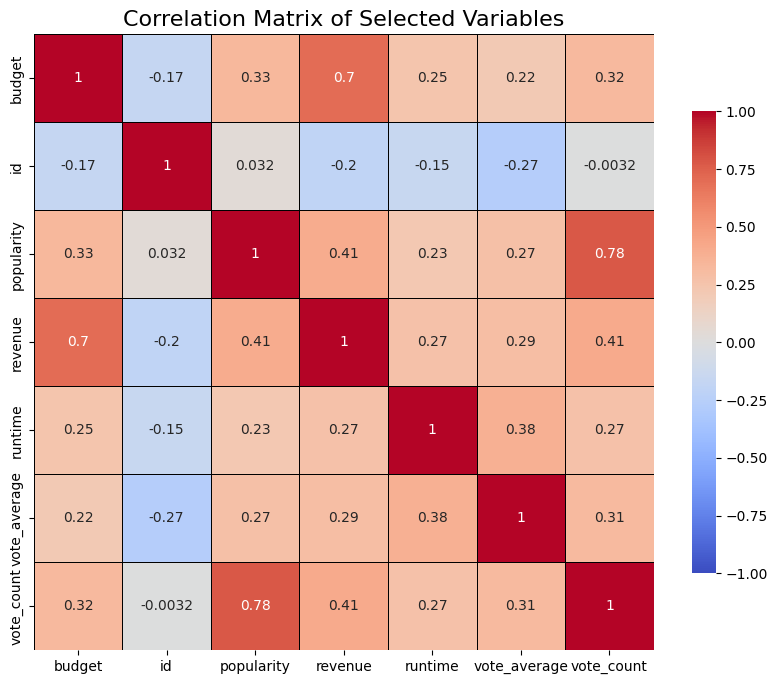

In [10]:
correlation_matrix = movie_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, 
            linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.75})

plt.title('Correlation Matrix of Selected Variables', fontsize=16)


In [12]:
top_movies = movie_data.sort_values(by='revenue', ascending=False)
top_movies.head()

,budget,genres,id,keywords,original_title,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count
0,8.374748,"Action, Adventure, Fantasy, Science Fiction",19995,"culture clash, future, space war, space colony...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,9.445287,162.0,Enter the World of Pandora.,Avatar,7.2,11800
25,8.301030,"Drama, Romance, Thriller",597,"shipwreck, iceberg, ship, panic, titanic, ocea...",Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,1997-11-18,9.266004,194.0,Nothing on Earth could come between them.,Titanic,7.5,7562
16,8.342423,"Science Fiction, Action, Adventure",24428,"new york, shield, marvel comic, superhero, bas...",The Avengers,When an unexpected enemy emerges and threatens...,144.448633,2012-04-25,9.181717,143.0,Some assembly required.,The Avengers,7.4,11776
28,8.176091,"Action, Adventure, Science Fiction, Thriller",135397,"monster, dna, tyrannosaurus rex, velociraptor,...",Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,2015-06-09,9.179991,124.0,The park is open.,Jurassic World,6.5,8662
44,8.278754,Action,168259,"car race, speed, revenge, suspense, car, race,...",Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,2015-04-01,9.177897,137.0,Vengeance Hits Home,Furious 7,7.3,4176


In [15]:
df = pd.DataFrame(top_movies)

df['genres'] = df['genres'].str.split(', ')
df = df.explode('genres')

grouped = df.groupby('genres')[['popularity', 'revenue']].mean()

grouped
grouped.to_csv('genres_popularity', index=False)


Analysis of VarianceRegression allows us to understand how independent variables influence the dependent variable, while Analysis of Variance (ANOVA) helps us to examine these relationships more deeply.

​

In [15]:
genre_groups = df.groupby('genres')['revenue'].apply(list)

f_statistic, p_value = f_oneway(*genre_groups)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the revenues of different genres.")
else:
    print("There is no significant difference between the revenues of different genres.")


F-Statistic: 33.59771071003856
P-Value: 9.040698549201039e-126
There is a significant difference between the revenues of different genres.


In [16]:
revenue_by_season = pd.DataFrame(top_movies)

revenue_by_season['release_date'] = pd.to_datetime(revenue_by_season['release_date'])

revenue_by_season['release_month'] = revenue_by_season['release_date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

revenue_by_season['release_season'] = revenue_by_season['release_month'].apply(get_season)

season_revenue = revenue_by_season.groupby('release_season')['revenue'].sum().reset_index()
season_revenue

,release_season,revenue
0,Fall,7260.075398
1,Spring,5621.280027
2,Summer,6727.423909
3,Winter,5882.136350


Topic modeling using the LDA  algorithm is a popular method for discovering hidden topics in a collection of texts. This method helps you understand what topics are present in each text.

In [33]:


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

custom_stopwords = set(stopwords.words('english') + ['one', 'two', 'film', 'new', 'get'])

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if isinstance(text, str):  
        text = re.sub(r'\W+', ' ', text)  
        words = word_tokenize(text.lower()) 
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords and len(word) > 2]  # حذف کلمات توقف و کلمات کوتاه و ریشه‌یابی
        return words
    else:
        return []

texts = [preprocess(overview) for overview in top_movies['overview']]


lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=30, iterations=400)


for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiraz1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiraz1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shiraz1\AppData\Roaming\nltk_data...


Topic: 0 
Words: 0.008*"life" + 0.006*"new" + 0.006*"one" + 0.005*"family" + 0.004*"two" + 0.004*"young" + 0.004*"man" + 0.004*"love" + 0.004*"get" + 0.004*"friends"
Topic: 1 
Words: 0.005*"young" + 0.004*"life" + 0.004*"story" + 0.004*"man" + 0.004*"world" + 0.004*"war" + 0.004*"one" + 0.003*"must" + 0.003*"two" + 0.003*"find"
Topic: 2 
Words: 0.005*"world" + 0.004*"team" + 0.003*"earth" + 0.003*"film" + 0.003*"war" + 0.002*"mission" + 0.002*"planet" + 0.002*"new" + 0.002*"must" + 0.002*"government"


Regression analysis


In [23]:

data_reg = top_movies

X = data_reg[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']]

y = data_reg['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)

X_test = sm.add_constant(X_test)  

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     891.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:34:09   Log-Likelihood:                -8827.5
No. Observations:                3840   AIC:                         1.767e+04
Df Residuals:                    3834   BIC:                         1.770e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.2481      0.245     -5.094   

According to the assumption of homoscedasticity in multiple regression, there should be no pattern between the residuals and the predicted values. This means that the spread of the residuals should remain constant across the range of predicted values, without any specific direction or trend. If a pattern is observed, it may indicate a violation of homoscedasticity, which can affect the validity of the model's results.

<Axes: xlabel='None', ylabel='None'>

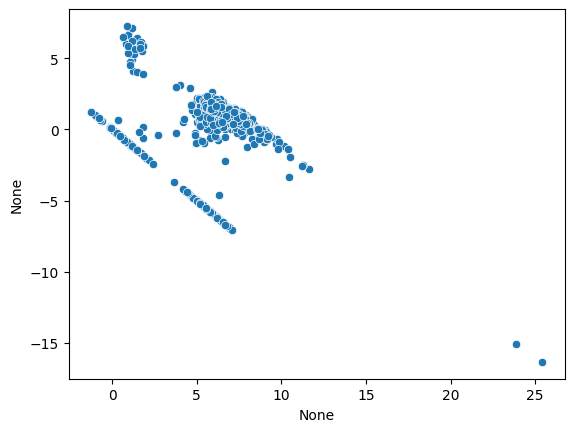

In [28]:
fitted_values = model.predict(X_test)

residuals = y_test - fitted_values

sns.scatterplot(x=fitted_values, y=residuals)

According to the assumption of normality in regression, the residuals should be normally distributed. This histogram helps visualize whether the residuals follow a normal distribution. If the histogram shows a bell-shaped curve, it supports the normality assumption. However, if the distribution deviates significantly from normality (e.g., showing skewness or kurtosis), it may suggest a violation of the normality assumption, which can impact the accuracy of the model's inferences and predictions.

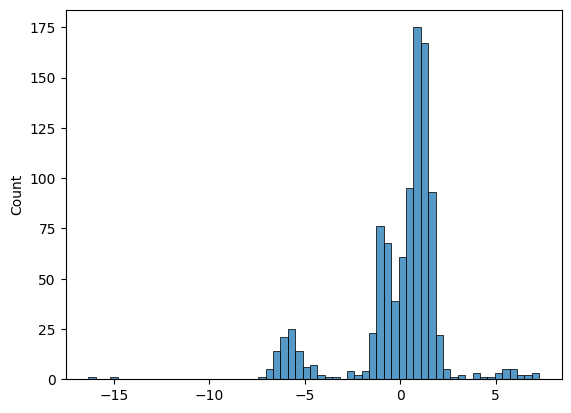

In [29]:
fig = sns.histplot(residuals)